# DATA PREPROCESSING

### MovieViewing

### [ k_movie 컬럼 정의서]
* MOVIE_NM : 영화명
* DRCTR_NM : 감독명
* MAKR_NM : 제작사명
* DISTB_CMPNY_NM : 유통회사명
* OPN_DE : 개방일자
* MOVIE_TY_NM : 영화유형명
* MOVIE_STLE_NM : 영화형태명
* NLTY_NM : 국적명
* TOT_SCRN_CO : 총 스크린 수
* SALES_PRICE : 매출금액
* VIEWING_NMPR_CO : 관람인원 수
* SEOUL_SALES_PRICE : 서울 매출금액
* SEOUL_VIEWING_NMPR_CO : 서울 관람인원 수
* GENRE_NM : 장르명
* GRAD_NM : 등급명
* MOVIE_SDIV_NM : 영화구분명
* CRITIC_RT : 평론가 평점
* VIEWER_RT : 네티즌 평점

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as miss
import matplotlib.pyplot as plt

In [63]:
rate = pd.read_excel("movie_rate_change.xlsx")
rate.rename(columns = {'제목':'MOVIE_NM','평론가 평점':'CRITIC_RT','네티즌 평점':'VIEWER_RT'}, inplace = True)

movie = pd.read_csv("ALL_KC_KOBIS_BOX_OFFIC_MOVIE_INFO.csv")
movie = movie[movie['NLTY_NM']=='한국']
movie = movie.drop(['INCME_CMPNY_NM'], axis=1) #한국 영화는 수입회사가 따로 없으므로 제거

In [64]:
rate.head()

,Unnamed: 0,NO,MOVIE_NM,url,CRITIC_RT,VIEWER_RT
0,0,1,산상수훈,https://movie.naver.com/movie/bi/mi/basic.nave...,3.00,6.30
1,1,2,교회오빠,https://movie.naver.com/movie/bi/mi/basic.nave...,5.59,9.31
2,2,3,기생충,https://movie.naver.com/movie/bi/mi/basic.nave...,9.06,8.49
3,3,4,엑시트,https://movie.naver.com/movie/bi/mi/basic.nave...,5.59,7.44
4,4,5,김복동,https://movie.naver.com/movie/bi/mi/basic.nave...,6.60,8.83


In [65]:
movie.head()

,NO,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,SALES_PRICE,VIEWNG_NMPR_CO,SEOUL_SALES_PRICE,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM
0,1,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,3.206000e+06,284.0,3206000.0,284.0,드라마,전체관람가,독립/예술영화
1,2,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,1.499000e+06,154.0,1499000.0,154.0,다큐멘터리,전체관람가,독립/예술영화
3,4,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,1.575865e+09,227811.0,684991280.0,97354.0,드라마,15세이상관람가,일반영화
6,7,엑시트,이상근,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,20190731,개봉영화,장편,한국,1660.0,2.000000e+05,40.0,0.0,0.0,코미디,12세이상관람가,일반영화
7,8,김복동,송원근,한국탐사저널리즘센터,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,7.700000e+05,110.0,0.0,0.0,다큐멘터리,12세이상관람가,독립/예술영화


In [66]:
rate.count()

Unnamed: 0    553
NO            553
MOVIE_NM      553
url           553
CRITIC_RT     553
VIEWER_RT     553
dtype: int64

In [67]:
movie.count()

NO                      2126
MOVIE_NM                2126
DRCTR_NM                2107
MAKR_NM                 2111
DISTB_CMPNY_NM          2125
OPN_DE                  2126
MOVIE_TY_NM             2126
MOVIE_STLE_NM           2126
NLTY_NM                 2126
TOT_SCRN_CO             2099
SALES_PRICE             1202
VIEWNG_NMPR_CO          1950
SEOUL_SALES_PRICE       1740
SEOUL_VIEWNG_NMPR_CO    1988
GENRE_NM                2122
GRAD_NM                 2126
MOVIE_SDIV_NM           2126
dtype: int64

In [82]:
k_movie = pd.merge(left = movie, right = rate, how = "inner", on = "MOVIE_NM")
k_movie = k_movie.drop(['NO_x', 'NO_y','url', 'Unnamed: 0'], axis = 1)

k_movie.head()

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,SALES_PRICE,VIEWNG_NMPR_CO,SEOUL_SALES_PRICE,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT
0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,3.206000e+06,284.0,3206000.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,1.499000e+06,154.0,1499000.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31
2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,1.575865e+09,227811.0,684991280.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49
3,엑시트,이상근,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,20190731,개봉영화,장편,한국,1660.0,2.000000e+05,40.0,0.0,0.0,코미디,12세이상관람가,일반영화,5.59,7.44
4,김복동,송원근,한국탐사저널리즘센터,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,7.700000e+05,110.0,0.0,0.0,다큐멘터리,12세이상관람가,독립/예술영화,6.60,8.83


In [83]:
k_movie = k_movie.replace(0.0, np.NaN)

In [84]:
k_movie.head()

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,SALES_PRICE,VIEWNG_NMPR_CO,SEOUL_SALES_PRICE,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT
0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,3.206000e+06,284.0,3206000.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,1.499000e+06,154.0,1499000.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31
2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,1.575865e+09,227811.0,684991280.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49
3,엑시트,이상근,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,20190731,개봉영화,장편,한국,1660.0,2.000000e+05,40.0,NaN,NaN,코미디,12세이상관람가,일반영화,5.59,7.44
4,김복동,송원근,한국탐사저널리즘센터,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,7.700000e+05,110.0,NaN,NaN,다큐멘터리,12세이상관람가,독립/예술영화,6.60,8.83


In [85]:
k_movie.dtypes

MOVIE_NM                 object
DRCTR_NM                 object
MAKR_NM                  object
DISTB_CMPNY_NM           object
OPN_DE                   object
MOVIE_TY_NM              object
MOVIE_STLE_NM            object
NLTY_NM                  object
TOT_SCRN_CO             float64
SALES_PRICE             float64
VIEWNG_NMPR_CO          float64
SEOUL_SALES_PRICE       float64
SEOUL_VIEWNG_NMPR_CO    float64
GENRE_NM                 object
GRAD_NM                  object
MOVIE_SDIV_NM            object
CRITIC_RT               float64
VIEWER_RT               float64
dtype: object

In [86]:
k_movie.isna().sum()

MOVIE_NM                  0
DRCTR_NM                 15
MAKR_NM                  12
DISTB_CMPNY_NM            0
OPN_DE                    0
MOVIE_TY_NM               0
MOVIE_STLE_NM             0
NLTY_NM                   0
TOT_SCRN_CO              25
SALES_PRICE             281
VIEWNG_NMPR_CO          165
SEOUL_SALES_PRICE       297
SEOUL_VIEWNG_NMPR_CO    157
GENRE_NM                  1
GRAD_NM                   0
MOVIE_SDIV_NM             0
CRITIC_RT                 0
VIEWER_RT                 7
dtype: int64

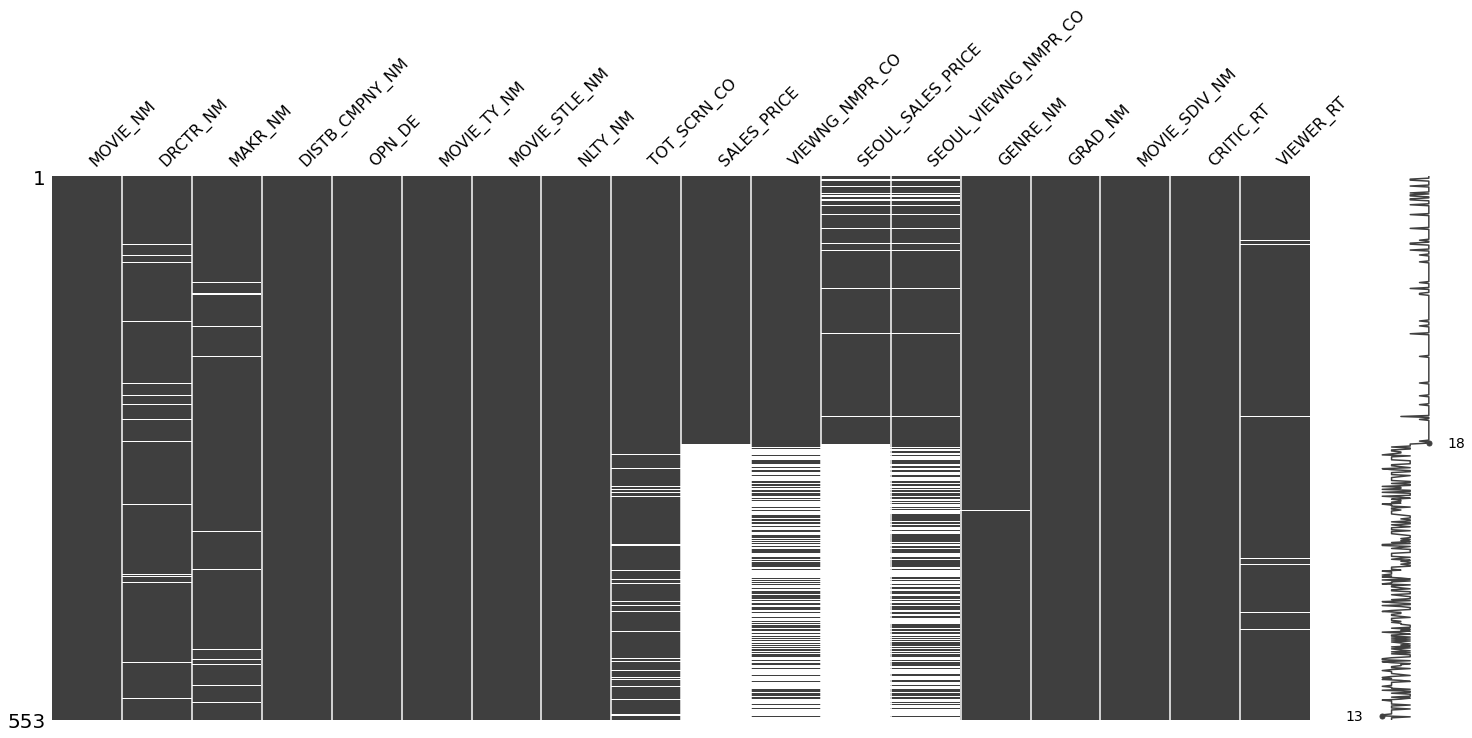

In [73]:
miss.matrix(k_movie)
plt.show()

In [74]:
k_movie = k_movie.drop(['SALES_PRICE', 'SEOUL_SALES_PRICE'], axis = 1) #매출금액, 서울 매출금액 열 제거
k_movie.dropna(subset=['VIEWNG_NMPR_CO'], how = 'any', axis=0, inplace=True) #관람객 수를 기준으로 흥행을 예측하므로, 관람객 수 없는 행 제거

In [75]:
k_movie = k_movie.dropna(thresh=0.9*len(k_movie.columns), axis=0) #데이터가 0.9 이상 없는 행 제거

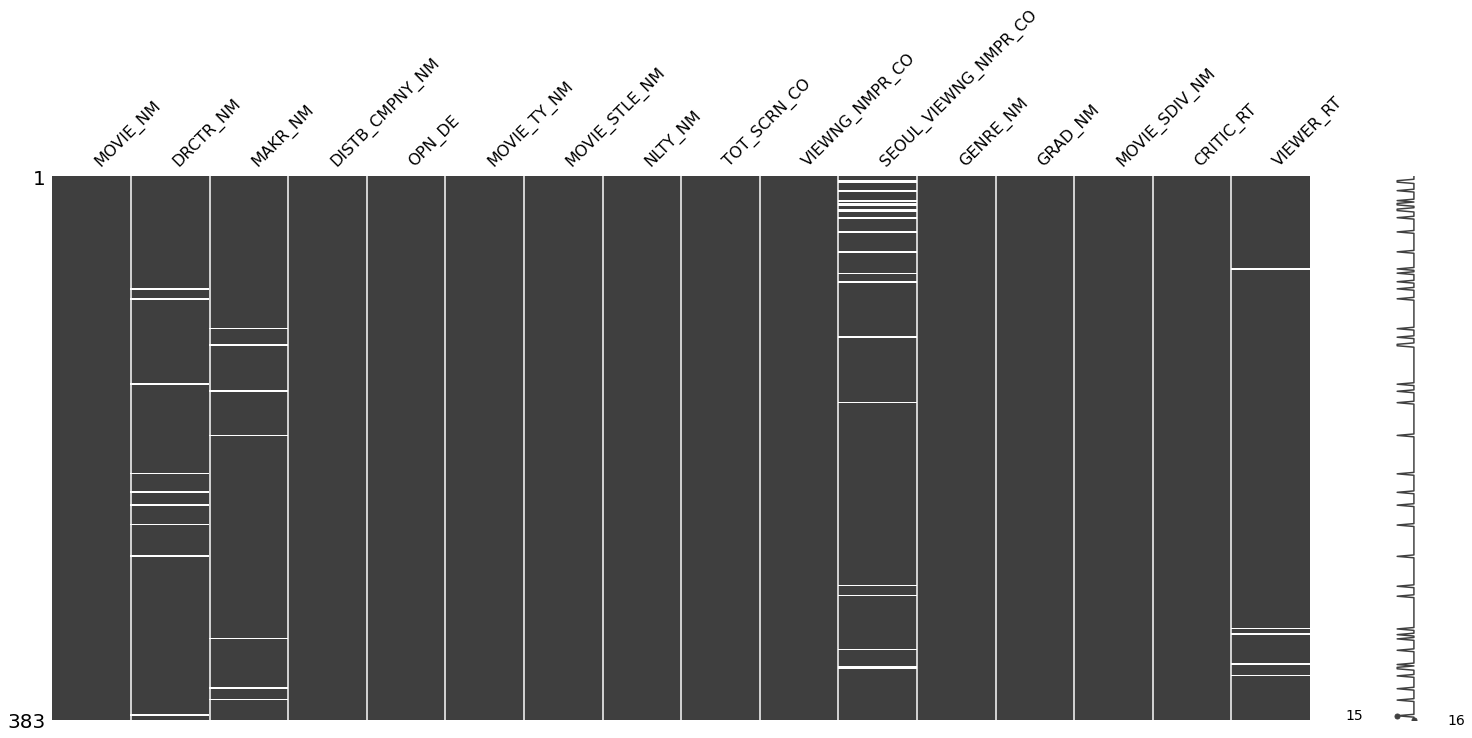

In [76]:
miss.matrix(k_movie)
plt.show()

In [77]:
k_movie['DRCTR_NM'] = k_movie['DRCTR_NM'].fillna("감독명 누락")
k_movie['MAKR_NM'] = k_movie['MAKR_NM'].fillna("제작사 미상")

In [78]:
k_movie.count()

MOVIE_NM                383
DRCTR_NM                383
MAKR_NM                 383
DISTB_CMPNY_NM          383
OPN_DE                  383
MOVIE_TY_NM             383
MOVIE_STLE_NM           383
NLTY_NM                 383
TOT_SCRN_CO             383
VIEWNG_NMPR_CO          383
SEOUL_VIEWNG_NMPR_CO    363
GENRE_NM                383
GRAD_NM                 383
MOVIE_SDIV_NM           383
CRITIC_RT               383
VIEWER_RT               378
dtype: int64

In [79]:
k_movie = k_movie.dropna()

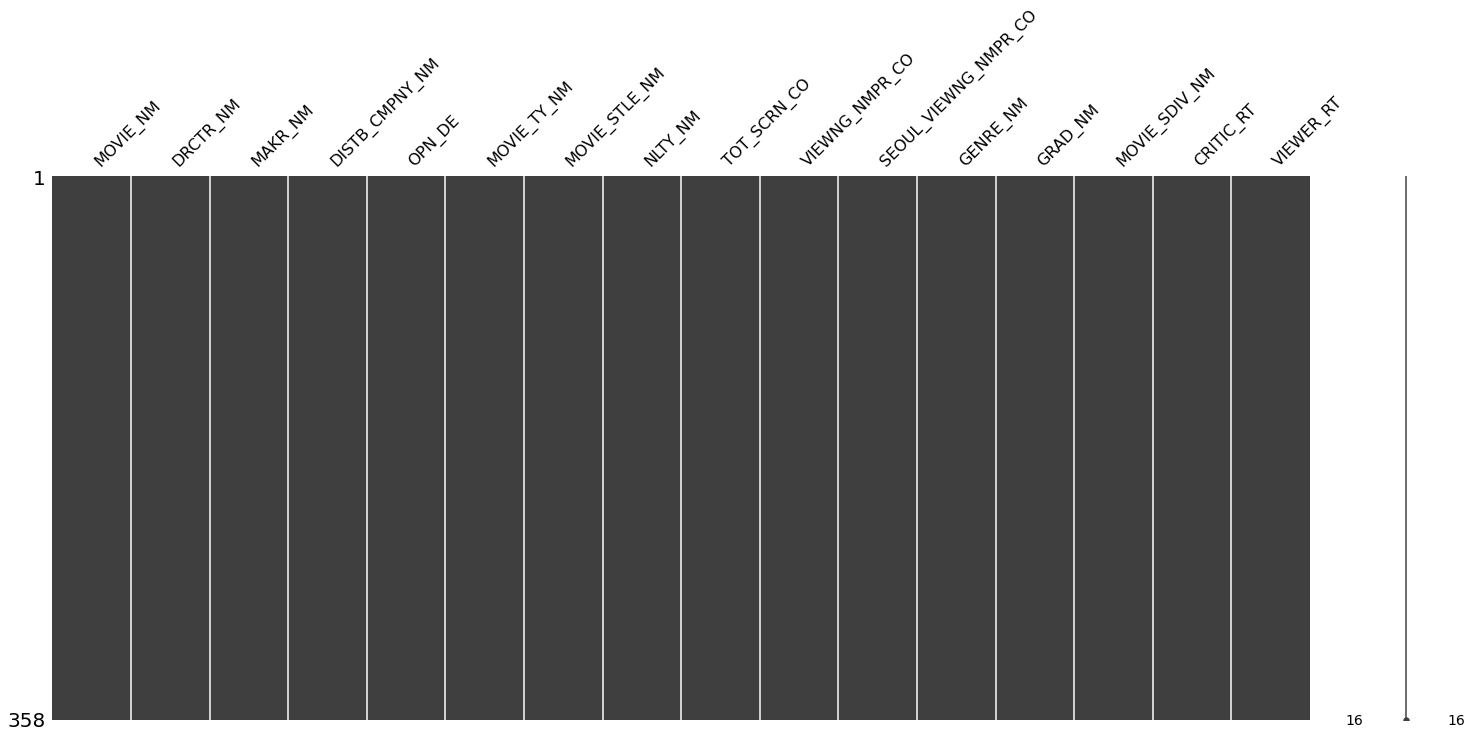

In [80]:
miss.matrix(k_movie)
plt.show()

In [81]:
k_movie.to_csv("k_movie.csv")